# Preprocessing Dataset #2

## Import the data

In [ ]:
import pandas as pd
# 1. Load the datasets into Pandas dataframes
names2=['A1-Time','A2','A3','A4','A5','A6','A7','A8','A9','LABEL']
#Full training set will be split into training and validation
dataset2_trn_full = pd.read_csv('shuttle_trn.csv', index_col=False, names=names2, sep=' ', engine='python') 
dataset2_test = pd.read_csv('shuttle_tst.csv', index_col=False, names=names2, sep=' ', engine='python')


## Data visulization & Cleaning
### Note: Data is complete, no missing entries

In [ ]:
# Visualizing data to have a better idea of the data
# Plotting frequency of different attribute values since there are only 9 (+ 1 for assigned labels)
import matplotlib.pyplot as plt
from scipy.stats import zscore
from scipy import stats
import numpy as np

# Visualize all numerical categories
dataset2_trn_full.hist(figsize=(20, 14))

'''
#removing outliers
subset=dataset2_trn.loc[:,'A2':'A9']
print(subset)
z_scores = stats.zscore(subset)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
print(filtered_entries)
dataset2_trn = dataset2_trn[filtered_entries]'''

print(dataset2_trn_full.describe())



In [ ]:
# Normalizing data since scales of some attributes are drastically different
from sklearn import preprocessing

x_train2 = dataset2_trn_full.values
'''min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x_train)
normalized_dataset_2 = pd.DataFrame(x_scaled, columns=names2)

normalized_dataset_2.hist(figsize=(20, 14))'''

scaler = preprocessing.StandardScaler()

# fit the scaler 
scaler.fit(x_train2)

# transform the data
x_train_normal = scaler.transform(x_train2)

normalized_dataset2 = pd.DataFrame(x_train_normal, columns=names2)

normalized_dataset2.hist(figsize=(20, 14))

print(normalized_dataset2.describe())




## One-hot coding
### No need for one-hot coding since all attributes and labels are numerical values

# Experiments Dataset #2

## Cross Validation

### Split training data into training and validation, start with 9:1 ratio (90% traning, 10% validation)

In [ ]:
x_d2=normalized_dataset2.loc[:,'A1-Time':'A9']
y_d2=normalized_dataset2.loc[:,'LABEL']

def splitTraining(p_val,num_instances):
    n_val=num_instances//p_val
    inds = np.random.permutation(num_instances)
    x_val2,y_val2=x_d2.loc[inds[:n_val],:],y_d2.loc[inds[:n_val]]
    x_train2,y_train2=x_d2.loc[inds[n_val:],:],y_d2.loc[inds[n_val:]]
    
    return n_val, x_val2,y_val2, x_train2, y_train2

### Cross validation method

In [ ]:
def cross_validate(total_nval, n_folds=5):
    #get the number of data samples in each split
    n_val = total_nval // n_folds
    inds = np.random.permutation(total_nval)
    inds = []
    for f in range(n_folds):
        tr_inds = []
        #get the validation indexess
        val_inds = list(range(f * n_val, (f+1)*n_val))
        #get the train indexes
        if f > 0:
            tr_inds = list(range(f*n_val))
        if f < n_folds - 1:
            tr_inds = tr_inds + list(range((f+1)*n_val, total_nval))
        #The yield statement suspends function’s execution and sends a value back to the caller
        #but retains enough state information to enable function to resume where it is left off
        yield tr_inds, val_inds

### Setting up training/validation data sets and variables needed for hyperparameter analysis

In [ ]:
(trn_instances, num_features) = dataset2_trn_full.shape
num_folds = 5

#split the data
(n_val, x_val2,y_val2, x_train2, y_train2)=splitTraining(10,trn_instances)
#converting training and validation dataframe sets to numpy arrays
x_val2=x_val2.to_numpy()
y_val2=y_val2.to_numpy()
x_train2=x_train2.to_numpy()
y_train2=y_train2.to_numpy()

#define a function for the MSE losss
loss = lambda y, yh: np.mean((y-yh)**2)

# KNN

## Evaluating best number of K neighbors

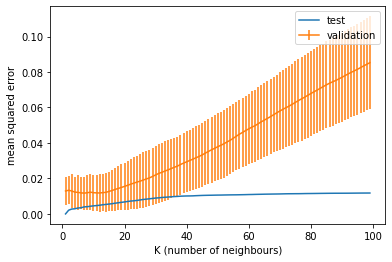

In [149]:
from sklearn import neighbors

K_list=range(1,100)

err_train,err_valid = np.zeros(len(K_list)), np.zeros((len(K_list), num_folds))

#Evaluating best number of K neighbors
for i, K in enumerate(K_list):
    #Find the validation errors for num_folds splits for a given K
    model = neighbors.KNeighborsRegressor(n_neighbors=K)
    model = model.fit(x_train2, y_train2)
    err_train[i]= loss(y_train2, model.predict(x_train2))
    for f, (tr, val) in enumerate(cross_validate(n_val, num_folds)):
        model = neighbors.KNeighborsRegressor(n_neighbors=K)
        model = model.fit(x_val2[tr,:], y_val2[tr])
        err_valid[i, f] = loss(y_val2[val], model.predict(x_val2[val])) 
   
plt.plot(K_list, err_train,  label='test')
plt.errorbar(K_list, np.mean(err_valid, axis=1), np.std(err_valid, axis=1), label='validation')
plt.legend()
plt.xlabel('K (number of neighbours)')
plt.ylabel('mean squared error')
plt.show()


## Evaluating best distance to use (Euclidean or Manhattan)

## Verifying custom cross-validation results against cross-validation package

In [ ]:
from sklearn.model_selection import cross_val_score
#add sklearn cross val method for verification purposes


# Decision Tree

## Evaluating best split criterion without max depth limitation

In [ ]:
from sklearn.tree import DecisionTreeClassifier

## TO BE CHANGED FOR DECISION TREE
for i, K in enumerate(K_list):
    #Find the validation errors for num_folds splits for a given K
    model = neighbors.KNeighborsRegressor(n_neighbors=K)
    model = model.fit(x_train2, y_train2)
    err_train[i]= loss(y_train2, model.predict(x_train2))
    for f, (tr, val) in enumerate(cross_validate(n_val, num_folds)):
        model = neighbors.KNeighborsRegressor(n_neighbors=K)
        model = model.fit(x_val2[tr,:], y_val2[tr])
        err_valid[i, f] = loss(y_val2[val], model.predict(x_val2[val])) 
   
plt.plot(K_list, err_train,  label='test')
plt.errorbar(K_list, np.mean(err_valid, axis=1), np.std(err_valid, axis=1), label='validation')
plt.legend()
plt.xlabel('K (number of neighbours)')
plt.ylabel('mean squared error')
plt.show()

## Evaluating best max depth limitation with Gini index

## Evaluating best max depth limitation with Entropy 